# Enriquecimiento de Datos Demográficos en Estados Unidos

En esta parte del proceso **ETL**, buscamos **ampliar y enriquecer** nuestro conjunto de datos para realizar un análisis más exhaustivo y con una perspectiva más amplia. Con este propósito, hemos decidido incorporar datos oficiales proporcionados por el organismo encargado de los censos demográficos en Estados Unidos, lo que nos permitirá obtener una visión más completa y precisa de la situación demográfica del país.

El organismo que regula y publica estos datos es la **Oficina del Censo de los Estados Unidos** (_U.S. Census Bureau_), responsable de recopilar, analizar y difundir datos sobre la población y la economía del país. Entre sus funciones más destacadas se encuentra la realización del censo decenal, que proporciona una imagen detallada y precisa de la composición demográfica de la nación, incluidos aspectos como la distribución por **edad**, **género**, **etnia**, y otros factores clave.

## Importancia de la Demografía de Personas de Origen Asiático

En nuestro análisis, consideramos de particular importancia la demografía de personas de **origen asiático** en los Estados Unidos. Por ello, hemos extraído y procesado conjuntos de datos directamente desde la plataforma oficial del U.S. Census Bureau, disponible en [data.census.gov](https://data.census.gov). Estos datos nos ofrecerán una base sólida para analizar la distribución y las características demográficas de la población asiática, lo cual es crucial para comprender su influencia y presencia en el país, especialmente en el contexto de nuestro estudio sobre el sector de la **comida china** en los Estados Unidos.

Al integrar estos **datos oficiales**, buscamos no solo ampliar nuestro conocimiento sobre la población asiática, sino también fortalecer la validez de nuestros hallazgos, asegurando que estén respaldados por **fuentes confiables** y reconocidas a nivel nacional.


___


# ¿Por qué es importante conocer el porcentaje de personas pertenecientes a la comunidad asiática y su distribución demográfica?

Conocer la composición demográfica de la comunidad asiática es esencial para nuestro restaurante de comida china al considerar estrategias de expansión. Esta comunidad suele ser uno de los consumidores más frecuentes de nuestra oferta gastronómica. Al identificar áreas con alta concentración de población asiática, podemos optimizar nuestras ubicaciones y adaptar nuestras estrategias de marketing para satisfacer mejor sus preferencias. Así, el análisis del porcentaje de la comunidad asiática y su distribución nos ayuda a tomar decisiones informadas para nuestro crecimiento y éxito.

## Comunidad asiática por año:

Para comenzar con este análisis demográfico compararemos el porcentaje de gente de origen asiático en "la costa este" sector de los estados unidos en el que la empresa a la que prestamos nuestro servicio "China Garden" desea invertir. 
El Objetivo de esta primera parte es obtener una tabla con el numero de habitantes de origen asiatico por año. la tabla que utilizaremos es "_B03002: "Hispanic or Latino Origin by Race."_. Esta tabla desglosa la población por origen hispano o latino y por raza en distintas categorías étnicas y raciales, lo que te permite analizar la distribución de la población según etnia.

## Combinación de Años

El primer DF será un historico de la comunidad asiática, contamos con un df distinto para cada uno de los años, por lo que primero combinaremos todos y haremos las transformaciones necesarias. 

In [66]:
import pandas as pd
import os
import numpy as np

# Ruta donde se encuentran los archivos CSV
ruta_carpeta = "C:\\Users\\fede\\Desktop\\PROYECTOFINAL\\Datasets Demografía"

# Lista de años de los archivos CSV
años = list(range(2010, 2023))

# Lista para almacenar los DataFrames
dataframes = []

# Leer y combinar todos los archivos CSV
for año in años:
    ruta_archivo = os.path.join(ruta_carpeta, f"{año}.csv")
    df = pd.read_csv(ruta_archivo)
    df['año'] = año  # Añadir la columna 'año'
    dataframes.append(df)

# Combinar todos los DataFrames en uno solo
df_filtrado = pd.concat(dataframes, ignore_index=True)

#eliminamos las series "margen de error"
df_filtrado = df_filtrado.filter(regex='^(?!.*Margin of Error)')

# Filtrar las filas de la columna "Label (Grouping)" que sean "Total:" o "Asian alone"
df_filtrado = df_filtrado[df_filtrado['Label (Grouping)'].isin(['Total:', "        Asian alone"])]
df_filtrado.reset_index(drop=True, inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fede\\Desktop\\PROYECTOFINAL\\Datasets Demografía\\2010.csv'

Convertir los valores numéricos a "float64"

In [45]:

# Convertir las columnas numéricas a tipo numérico, ignorando la columna 'Label (Grouping)'
# Eliminar las comas de las columnas numéricas
df_numerico = df_filtrado.drop(columns=['Label (Grouping)']).replace({',': ''}, regex=True)
df_numerico = df_numerico.apply(pd.to_numeric)
df_filtrado = pd.concat([df_filtrado[['Label (Grouping)']], df_numerico], axis=1)

En el DF original la comunidad asiática estaba dividida en dos subgrupos, por lo debemos combinar las filas pertenecientes al mismo año.


In [365]:
# Índices de las filas a combinar
pares_indices = [(1, 2), (4, 5), (7, 8), (10, 11), (13, 14), (16, 17), (19, 20), (22, 23), (25, 26), (28, 29), (31, 32), (34, 35), (37, 38)]

# Lista para almacenar las filas combinadas
filas_combinadas = []

for (i, j) in pares_indices:
    fila_combinada = df_filtrado.loc[i] + df_filtrado.loc[j]
    # Añadir la fila combinada a la lista
    filas_combinadas.append(fila_combinada)
    
# Convertir la lista de filas combinadas en un DataFrame
filas_combinadas = pd.DataFrame(filas_combinadas)

# Dividir la columna 'año' por 2 y convertir a entero
filas_combinadas['año'] = (filas_combinadas['año'] / 2).astype(int)

# Filtramos las filas con 'Label (Grouping)' == 'Total:'
filas_total = df_filtrado[df_filtrado['Label (Grouping)'] == 'Total:']

# Añadir estas filas al DataFrame combinado
df_combinado = pd.concat([filas_combinadas, filas_total])

# Ordenar el DataFrame por la columna 'año' y reasignarlo
df_combinado = df_combinado.sort_values(by=['año', 'United States!!Estimate']).reset_index(drop=True)


df_combinado.rename(columns={'Label (Grouping)': 'etnia'}, inplace=True)

df_combinado.loc[df_combinado['etnia'].str.contains('Asian', case=False, na=False), 'etnia'] = 'comunidad asiatica'


df_combinado




NameError: name 'df_filtrado' is not defined

### Exportación del DataFrame

In [47]:
#al ser un DF pequeño, lo dejaremos en formato csv
df_combinado.to_csv('ComunidadsiaticaPorAño.csv', index=False)


# Demografía Etnias Por County (Condado) 2022

County  es un término utilizado por el U.S. Census Bureau para describir las subdivisiones geográficas dentro de un estado, que pueden incluir ciudades, pueblos, municipios, y otras unidades administrativas. Estas subdivisiones permiten un análisis más detallado de la demografía a nivel local, capturando variaciones poblacionales y características específicas dentro de los condados.

El año 2022 es el más reciente para el cual se disponen datos demográficos completos, lo que lo convierte en una fuente clave para entender las tendencias actuales en la composición étnica y racial de estas subdivisiones. Estos datos son esenciales para estudios de planificación urbana y desarrollo económico. Hemos decidido para acortar y simplificar nuestro DataSet Tomar en cuenta los "County Subdivissions" unicamente de los estados pertinentes, ya que al fin y al cabo la finalidad es encontrar las mejores locaciones para restaurantes nuevos de la cadena _China Garden_, en este caso en cuanto a características demográficas.  

In [23]:
import os
import pandas as pd
import numpy as np


# Ruta de la carpeta que contiene los archivos
carpeta = 'C:\\Users\\fede\\Downloads\\DemografíaPorCiudad'

# Lista para almacenar los DataFrames
dataframes = []

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv'): 
        ruta_archivo = os.path.join(carpeta, archivo)
        try:
            # Intenta leer el archivo con 'utf-8'
            df = pd.read_csv(ruta_archivo, encoding='utf-8')
        except UnicodeDecodeError:
            # Si hay un error de codificación, intenta con 'latin1'
            df = pd.read_csv(ruta_archivo, encoding='latin1')
        dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
DF_Demografía_Etnias = pd.concat(dataframes, ignore_index=True)



Nos quedamos unicamente con las columnas que hagan referencia a la comunidad asiatica y las combinamos.

In [24]:
# Filtrar las filas de la columna "Label (Grouping)" que sean "Total:" o "Asian alone"
DF_Demografía_Etnias = DF_Demografía_Etnias[DF_Demografía_Etnias['Label (Grouping)'].isin(['Total:', "        Asian alone"])]
DF_Demografía_Etnias.reset_index(drop=True, inplace=True)

Convertir las series a tipo numérico

In [25]:
# Reemplazar NaNs temporalmente con una cadena vacía y limpiar las columnas de texto
columnas_texto = DF_Demografía_Etnias.select_dtypes(include=['object', 'string']).columns
DF_Demografía_Etnias[columnas_texto] = (
    DF_Demografía_Etnias[columnas_texto]
    .fillna('')
    .replace({',': ''}, regex=True)
)

# Convertir columnas numéricas, ignorando errores
DF_Demografía_Etnias[columnas_texto] = DF_Demografía_Etnias[columnas_texto].apply(pd.to_numeric, errors='coerce')


In [26]:
# Combinando las filas deseadas y transponiendo
filas_comb = pd.concat([
    DF_Demografía_Etnias.iloc[[0, 3]].sum(),
    DF_Demografía_Etnias.iloc[[1, 4]].sum(),
    DF_Demografía_Etnias.iloc[[2, 5]].sum()
], axis=1).T.reset_index(drop=True)

fila_comb_1_2 = filas_comb.iloc[[1, 2]].sum()
filas_comb = pd.concat([filas_comb.iloc[[0]], pd.DataFrame([fila_comb_1_2])], ignore_index=True)

# Actualizar los valores de la columna 'Label (Grouping)'
filas_comb['Label (Grouping)'] = ['total', 'comunidad asiática'] + filas_comb['Label (Grouping)'].iloc[2:].tolist()


In [27]:
df = filas_comb

In [28]:
pd.set_option('display.max_rows', None)
df

,Label (Grouping),"Capitol Planning Region, Connecticut!!Estimate","Greater Bridgeport Planning Region, Connecticut!!Estimate","Lower Connecticut River Valley Planning Region, Connecticut!!Estimate","Naugatuck Valley Planning Region, Connecticut!!Estimate","Northeastern Connecticut Planning Region, Connecticut!!Estimate","Northwest Hills Planning Region, Connecticut!!Estimate","South Central Connecticut Planning Region, Connecticut!!Estimate","Southeastern Connecticut Planning Region, Connecticut!!Estimate","Western Connecticut Planning Region, Connecticut!!Estimate",...,"Radford city, Virginia!!Estimate","Richmond city, Virginia!!Estimate","Roanoke city, Virginia!!Estimate","Salem city, Virginia!!Estimate","Staunton city, Virginia!!Estimate","Suffolk city, Virginia!!Estimate","Virginia Beach city, Virginia!!Estimate","Waynesboro city, Virginia!!Estimate","Williamsburg city, Virginia!!Estimate","Winchester city, Virginia!!Estimate"
0,total,977165.0,326381.0,175244.0,451887.0,95687.0,112696.0,571298.0,280293.0,620666.0,...,16379.0,227171.0,99213.0,25372.0,25581.0,94856.0,457900.0,22341.0,15486.0,28103.0
1,comunidad asiática,57018.0,17876.0,6041.0,18305.0,1369.0,2811.0,24389.0,10827.0,32309.0,...,373.0,5128.0,3199.0,450.0,364.0,1790.0,32680.0,394.0,1085.0,589.0


Ahora buscaremos extraer el nombre del estado para añadirlo por separado en otro campo, esto con el objetivo de poder agruparlos por estado de ser necesario en partes posteriores del trabajo.

In [29]:
# Función para extraer el estado dividiendo la cadena
def extract_state(column_name):
    parts = column_name.split(', ')
    if len(parts) > 1:
        state_part = parts[-1]
        return state_part.split('!!')[0].strip()
    return 'Unknown'

# Aplicar la función a los nombres de las columnas
states = [extract_state(col) for col in df.columns]

# Convertir la lista en una nueva fila (con nombre de índice 'Region')
new_row = pd.DataFrame([states], columns=df.columns, index=['3'])

# Añadir la nueva fila al DataFrame
df = pd.concat([df, new_row])
valores = ['Total', 'Comunidad Asiática', 'Region']
# Primero asegúrate de que la longitud de 'valores' sea igual a la cantidad de índices que quieres reemplazar
for i, valor in enumerate(valores):
    if i < len(df):
        df.loc[df.index[i], 'Label (Grouping)'] = valor

In [30]:
df = df.T
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df.reset_index(drop=True, inplace=True)

In [31]:
# Restablecer el límite predeterminado de filas
pd.reset_option('display.max_rows')
df

,Label (Grouping),Total,Comunidad Asiática,Region
0,"Capitol Planning Region, Connecticut!!Estimate",977165.0,57018.0,Connecticut
1,"Greater Bridgeport Planning Region, Connecticu...",326381.0,17876.0,Connecticut
2,Lower Connecticut River Valley Planning Region...,175244.0,6041.0,Connecticut
3,"Naugatuck Valley Planning Region, Connecticut!...",451887.0,18305.0,Connecticut
4,"Northeastern Connecticut Planning Region, Conn...",95687.0,1369.0,Connecticut
...,...,...,...,...
601,"Suffolk city, Virginia!!Estimate",94856.0,1790.0,Virginia
602,"Virginia Beach city, Virginia!!Estimate",457900.0,32680.0,Virginia
603,"Waynesboro city, Virginia!!Estimate",22341.0,394.0,Virginia
604,"Williamsburg city, Virginia!!Estimate",15486.0,1085.0,Virginia


De la fila Label nos quedamos unicamente con el condado

In [32]:
# Eliminar todo lo que está después de la coma en la columna "Label (Grouping)"
df['Label (Grouping)'] = df['Label (Grouping)'].str.split(',').str[0]

# Renombrar la columna y eliminar "Label (Grouping)"
df['condado'] = df['Label (Grouping)']
df = df.drop(columns=['Label (Grouping)'])
# Eliminar las palabras "Region", "Planning" y "County" de la columna "condado"
df['condado'] = df['condado'].str.replace(r'\b(Region|Planning|County)\b', '', regex=True).str.strip()



In [34]:
df = df[df['Total'] != 0]
df['porcentaje comunidad asiatica'] = ((df['Comunidad Asiática'] / df['Total']) * 100).round(2)
# Eliminar las series 'Total' y 'Comunidad Asiática'
df = df.drop(columns=['Total', 'Comunidad Asiática'])

C:\Users\fede\AppData\Local\Temp\ipykernel_10472\3636079548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['porcentaje comunidad asiatica'] = ((df['Comunidad Asiática'] / df['Total']) * 100).round(2)


In [35]:
df


,Region,condado,porcentaje comunidad asiatica
0,Connecticut,Capitol,5.835043
1,Connecticut,Greater Bridgeport,5.477035
2,Connecticut,Lower Connecticut River Valley,3.447194
3,Connecticut,Naugatuck Valley,4.050791
4,Connecticut,Northeastern Connecticut,1.430706
...,...,...,...
601,Virginia,Suffolk city,1.887071
602,Virginia,Virginia Beach city,7.136929
603,Virginia,Waynesboro city,1.763574
604,Virginia,Williamsburg city,7.006328


### Exportación del DataFrame

In [39]:
#al ser un DF pequeño, lo dejaremos en formato csv
df.to_csv('Demografía2022County.csv', index=False)

# EDA


El Análisis Exploratorio de Datos (EDA) es un proceso que permite comprender las características principales de un conjunto de datos, identificar patrones, detectar anomalías y hacer suposiciones iniciales. Es relevante porque ayuda a preparar los datos para modelos más complejos y garantiza que cualquier análisis posterior esté basado en datos bien comprendidos y limpios.

En este proyecto, primero se realizarán análisis generales para obtener una visión amplia de los datos y sus tendencias. Posteriormente, se llevarán a cabo análisis específicos sobre los DataFrames  "Demografía Etnias Por County Subdivision 2022" y "ComunidadsiaticaPorAño", lo que permitirá identificar insights detallados y relevantes para el estudio.

Al ser Dataframes pequeños, a simple vista podemos ver que no hay nulos ni faltantes, por lo que omitiremos esos análisis

## Comunidad Asiatica Por Año 
_Analisis generales:_

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('C:\\Users\\fede\\Desktop\\Henry\\ProyectoFinal\\ComunidadsiaticaPorAño.csv')

Una de las primeras cosas que podríamos querer saber, es que porcentaje del total representa la comunidad asiática del total, y saber si este ha subido.

In [69]:
# Crear una copia del DataFrame para no modificar el original
df_resultado = df.copy()

# Iterar por las filas del DataFrame en pares de dos
for i in range(0, len(df_resultado), 2):
    # Calcular el porcentaje para cada columna excepto la columna 'etnia' y 'año'
    for columna in df_resultado.columns[1:-1]:  # Asumiendo que la primera columna es 'etnia' y la última es 'año'
        df_resultado.loc[i, columna] = (df_resultado.loc[i, columna] / df_resultado.loc[i + 1, columna]) * 100
    
    # La fila "Total" tiene 100% por definición, así que la dejamos igual
    df_resultado.loc[i + 1, df.columns[1:-1]] = 100

# Redondear los resultados a dos decimales
df_resultado = df_resultado.round(2)

df_resultado


#teniendo el valor como un porcentaje ya no nos interesa saber el total, ya que este siempre es el 100%
df = df_resultado[df_resultado['United States!!Estimate'] != 100]

C:\Users\fede\AppData\Local\Temp\ipykernel_10472\311172947.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.761052790326225' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resultado.loc[i, columna] = (df_resultado.loc[i, columna] / df_resultado.loc[i + 1, columna]) * 100
C:\Users\fede\AppData\Local\Temp\ipykernel_10472\311172947.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.755528612359882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_resultado.loc[i, columna] = (df_resultado.loc[i, columna] / df_resultado.loc[i + 1, columna]) * 100
C:\Users\fede\AppData\Local\Temp\ipykernel_10472\311172947.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Val

## Media, mediana y moda

In [70]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Calcular la media
media = df_numerico.mean()

# Calcular la mediana
mediana = df_numerico.median()

moda = df_numerico.mode().iloc[0]

pd.DataFrame(media)


,0
United States!!Estimate,5.373846
Connecticut!!Estimate,4.390769
Delaware!!Estimate,3.749231
Florida!!Estimate,2.683846
Georgia!!Estimate,3.843077
Maryland!!Estimate,6.190769
Massachusetts!!Estimate,6.369231
New Hampshire!!Estimate,2.493077
New Jersey!!Estimate,9.362308
New York!!Estimate,8.290000


In [71]:
pd.DataFrame(mediana)

,0
United States!!Estimate,5.43
Connecticut!!Estimate,4.53
Delaware!!Estimate,3.82
Florida!!Estimate,2.71
Georgia!!Estimate,3.87
Maryland!!Estimate,6.27
Massachusetts!!Estimate,6.47
New Hampshire!!Estimate,2.56
New Jersey!!Estimate,9.55
New York!!Estimate,8.45


In [62]:
pd.DataFrame(moda)

,0
United States!!Estimate,4.76
Connecticut!!Estimate,4.57
Delaware!!Estimate,3.05
Florida!!Estimate,2.79
Georgia!!Estimate,3.25
Maryland!!Estimate,5.53
Massachusetts!!Estimate,5.39
New Hampshire!!Estimate,2.56
New Jersey!!Estimate,8.24
New York!!Estimate,8.45


## Desviacion:

In [63]:

desviacion_estandar = df['United States!!Estimate'].std()
print(f"Desviación Estándar: {desviacion_estandar}")


Desviación Estándar: 0.3755338080994053


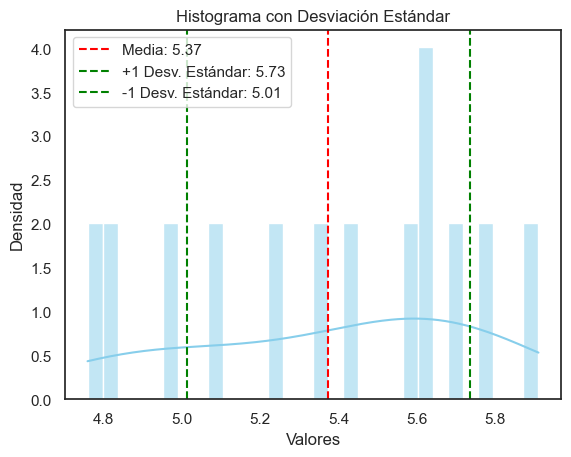

In [64]:

datos = df['United States!!Estimate']

# Calcular la media y la desviación estándar
media = np.mean(datos)
desviacion_estandar = np.std(datos)

# Graficar el histograma con la curva de densidad
sns.histplot(datos, kde=True, bins=30, color='skyblue', stat='density')

plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(media + desviacion_estandar, color='green', linestyle='--', label=f'+1 Desv. Estándar: {media + desviacion_estandar:.2f}')
plt.axvline(media - desviacion_estandar, color='green', linestyle='--', label=f'-1 Desv. Estándar: {media - desviacion_estandar:.2f}')

plt.title('Histograma con Desviación Estándar')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Conclusion:

De estos primeros y basicos análisis, lo mas interesante es la desviación estándar. Es una medida clave en estadística que nos indica cuánto se dispersan o varían los datos con respecto a la media. En este caso, la desviación estándar de 0.3755338080994053 ofrece una perspectiva sobre la dispersión de tus datos. Es un valor relativamente bajo, indicando que los datos están bastante concentrados alrededor de la media. En otras palabras, la mayoría de los valores en tu conjunto de datos están cercanos a la media, con una variación limitada.



## Análisis especificos:

C:\Users\fede\AppData\Local\Temp\ipykernel_3296\3756482859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['año'] = pd.to_numeric(df['año'], errors='coerce')


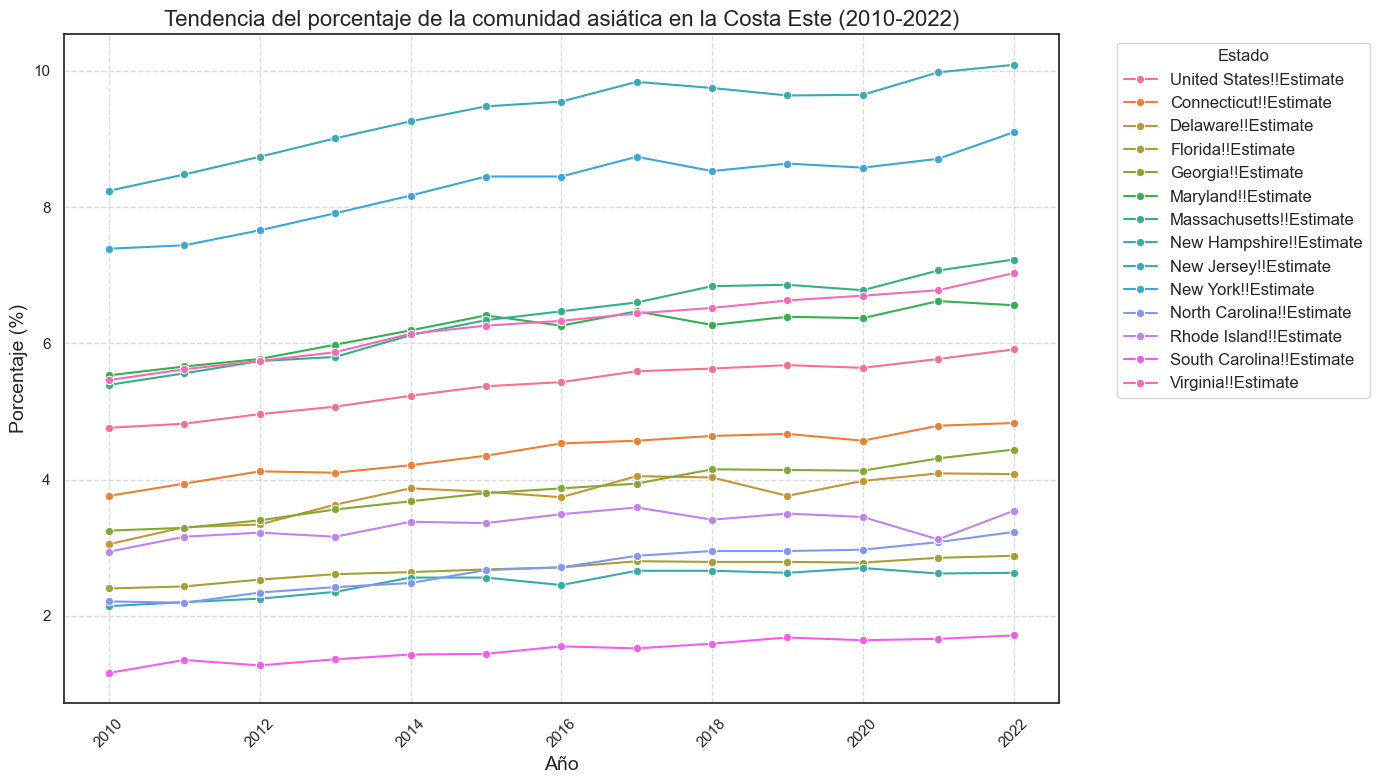

In [65]:

df['año'] = pd.to_numeric(df['año'], errors='coerce')

df_long = df.melt(id_vars=['año'], var_name='Estado', value_name='Porcentaje')

# Convertir la columna 'Porcentaje' a números y manejar posibles valores NaN
df_long['Porcentaje'] = pd.to_numeric(df_long['Porcentaje'], errors='coerce')
df_long = df_long.dropna(subset=['Porcentaje']) 


sns.set(style='white')
plt.figure(figsize=(14, 8))

sns.lineplot(data=df_long, x='año', y='Porcentaje', hue='Estado', marker='o')

plt.title('Tendencia del porcentaje de la comunidad asiática en la Costa Este (2010-2022)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.xticks(rotation=45)  
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

de este gráfico podemos concluir las siguientes cosas:



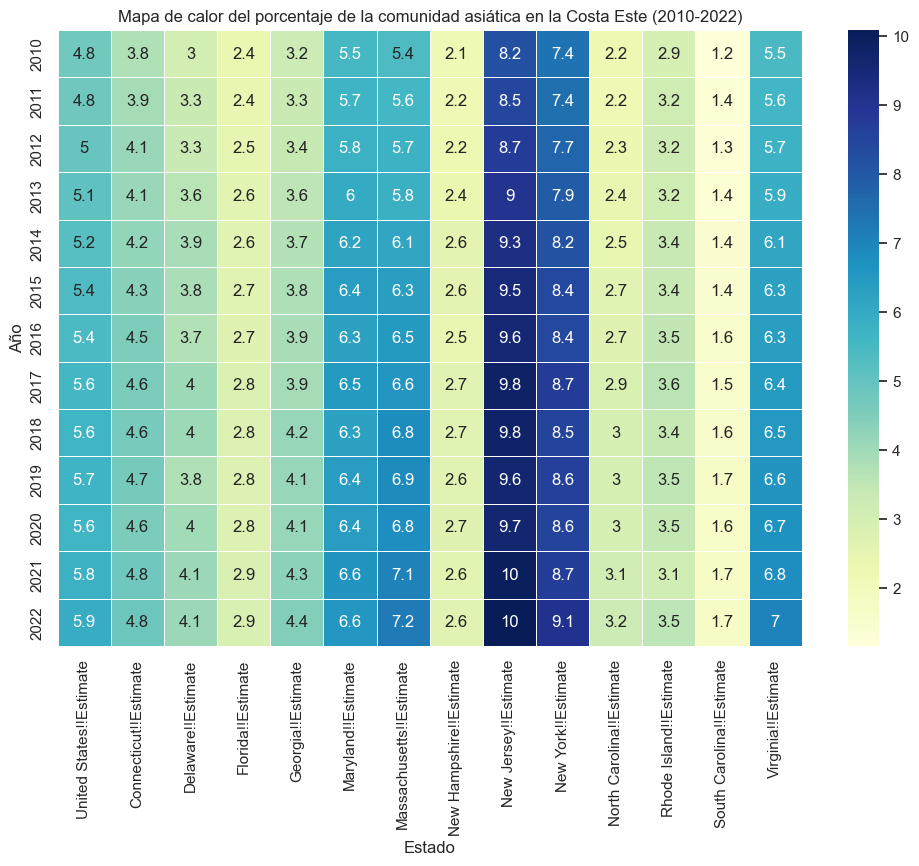

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.set_index('año').iloc[:, 1:], annot=True, cmap='YlGnBu', linewidths=.5)

plt.title('Mapa de calor del porcentaje de la comunidad asiática en la Costa Este (2010-2022)')
plt.xlabel('Estado')
plt.ylabel('Año')
plt.show()



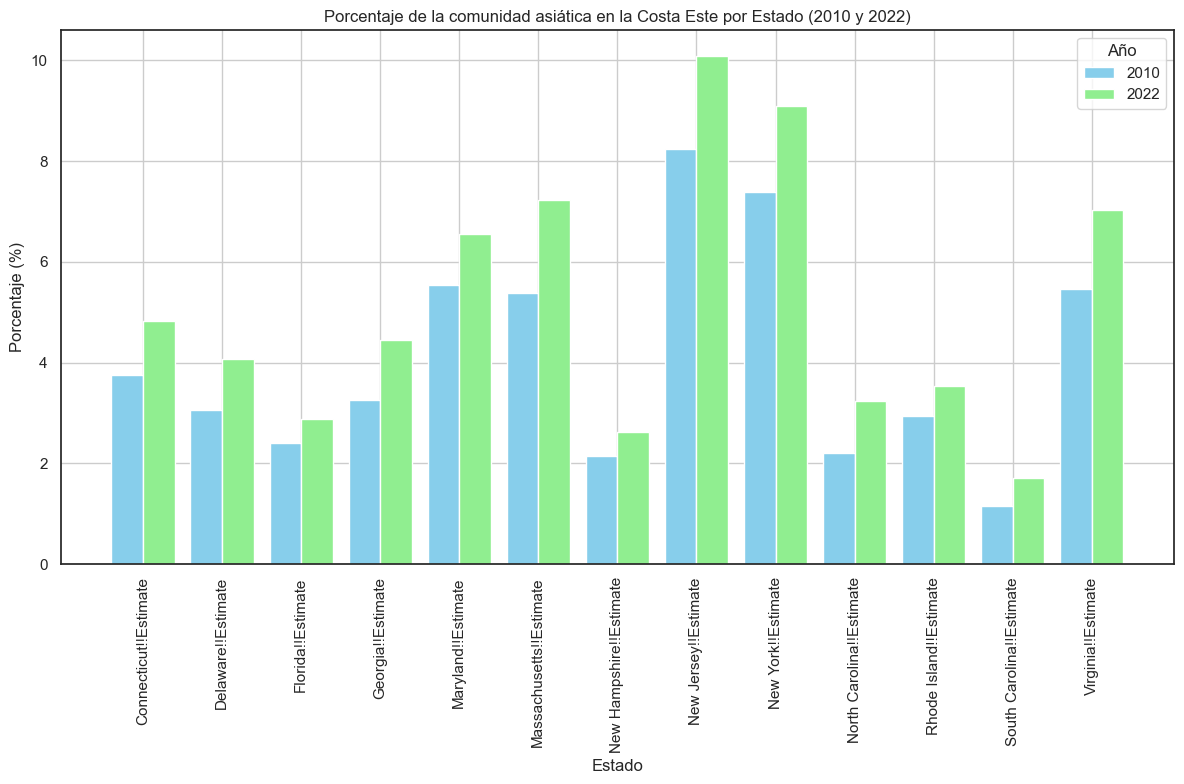

In [67]:
# Crear el DataFrame para 2010
df_2010 = df[df['año'] == 2010].set_index('etnia').iloc[:, 1:]
df_2010 = df_2010.drop(columns=['año'])

# Crear el DataFrame para 2022
df_2022 = df[df['año'] == 2022].set_index('etnia').iloc[:, 1:]
df_2022 = df_2022.drop(columns=['año'])

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Definir la posición de las barras
bar_width = 0.4  # Ancho de cada barra
index = np.arange(len(df_2010.columns))  # Posiciones para las barras

# Graficar los datos de 2010
bar_2010 = ax.bar(index - bar_width/2, df_2010.T.values.flatten(), bar_width, label='2010', color='skyblue')

# Graficar los datos de 2022
bar_2022 = ax.bar(index + bar_width/2, df_2022.T.values.flatten(), bar_width, label='2022', color='lightgreen')

# Configurar el gráfico
ax.set_title('Porcentaje de la comunidad asiática en la Costa Este por Estado (2010 y 2022)')
ax.set_xlabel('Estado')
ax.set_ylabel('Porcentaje (%)')
ax.set_xticks(index)
ax.set_xticklabels(df_2010.columns, rotation=90)  # Etiquetas en vertical
ax.grid(True)
ax.legend(title='Año')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Conclusiones generales:
Crecimiento General:

En la mayoría de los estados representados, el porcentaje de la comunidad asiática ha mostrado una tendencia creciente a lo largo del tiempo.
Esto indica que la población asiática ha estado aumentando en proporción en estos estados durante el período de tiempo analizado.
Estados con Mayor Porcentaje:

Los estados con los porcentajes más altos de población asiática son Nueva York (New York) y Nueva Jersey (New Jersey), ambos con un porcentaje que supera el 9% en 2022.
Massachusetts también tiene un porcentaje relativamente alto, aunque ligeramente por debajo de Nueva York y Nueva Jersey.
Estados con Menor Porcentaje:

Rhode Island y Carolina del Sur (South Carolina) tienen los porcentajes más bajos de población asiática, con valores que no superan el 4% en ningún año.
Estados con Crecimiento Rápido:

Georgia y Virginia muestran un crecimiento notable en el porcentaje de población asiática a lo largo de los años.
Otros estados como Delaware y Florida también muestran un crecimiento sostenido, aunque a un ritmo más moderado.
Estabilidad Relativa:

Algunos estados como Nueva York muestran una cierta estabilización en los últimos años, sugiriendo que aunque la población asiática sigue siendo alta, el ritmo de crecimiento podría estar disminuyendo.

En resumen, el gráfico sugiere un crecimiento constante en la proporción de la población asiática en la mayoría de los estados de la Costa Este, con algunos estados liderando en términos de porcentaje total, mientras que otros muestran un crecimiento más reciente pero notable.


Lo más notorio es que el crecimiento es paulatno y constante, sin saltos inesperados o tambien llamados "outsiders".

## Demogrfía 2022 por condado

Resulta interesante este análisis para conocer el estado actual de la demografía asiática en cada una de las distintas subdivisiones de la costa este, las cuales en total suman 75 subdivisiones.

In [366]:
df = pd.read_csv("C:\\Users\\fede\\Desktop\\Henry\\ProyectoFinal\\Demografía2022County.csv")

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Media, mediana y moda

In [41]:
media = df['porcentaje comunidad asiatica'].mean()
mediana = df['porcentaje comunidad asiatica'].median()
moda = df['porcentaje comunidad asiatica'].mode()[0] 

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 1.9785974862128908
Mediana: 1.0034380746781801
Moda: 0.0


## Desviacion:

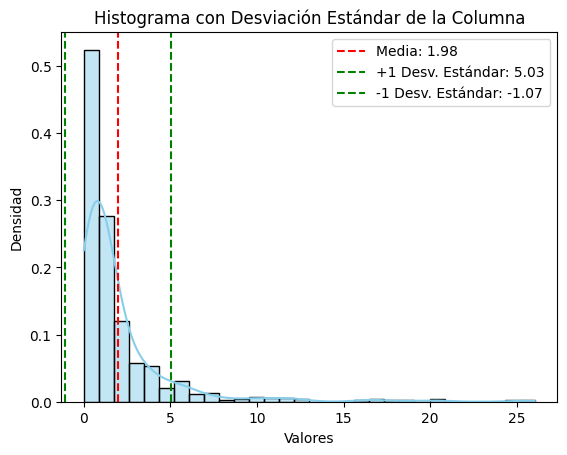

In [44]:


# Supongamos que tu DataFrame se llama df y la columna es 'porcentaje comunidad asiatica'
columna = df['porcentaje comunidad asiatica']

# Convertir la columna a una Serie numérica (ignorar posibles valores no numéricos)
columna_numerica = columna.apply(pd.to_numeric, errors='coerce')

# Calcular la media y la desviación estándar
media = np.mean(columna_numerica)
desviacion_estandar = np.std(columna_numerica)

# Graficar el histograma con la curva de densidad
sns.histplot(columna_numerica, kde=True, bins=30, color='skyblue', stat='density')

# Añadir líneas para la media y desviaciones estándar
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(media + desviacion_estandar, color='green', linestyle='--', label=f'+1 Desv. Estándar: {media + desviacion_estandar:.2f}')
plt.axvline(media - desviacion_estandar, color='green', linestyle='--', label=f'-1 Desv. Estándar: {media - desviacion_estandar:.2f}')

plt.title('Histograma con Desviación Estándar de la Columna')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()


El gráfico muestra la distribución de nuestro conjunto de datos, donde la mayoría de los valores se concentran cerca de 0. Sin embargo, hay una notable dispersión hacia valores más altos, lo que indica una distribución asimétrica con sesgo hacia la derecha. Esto sugiere que, aunque la mayoría de los datos están agrupados en valores bajos, existen algunos valores mucho mayores que incrementan la media y la varianza general. Las líneas de desviación estándar también muestran una dispersión considerable alrededor de la media, lo que refleja una alta variabilidad en los datos.

### Condado con Mayor Porcentaje de Comunidad Asiática por Estado

In [59]:
max_porcentaje_por_estado = df.loc[df.groupby('Region')['porcentaje comunidad asiatica'].idxmax()]
max_porcentaje_por_estado['Estado y Condado'] = max_porcentaje_por_estado['Region'] + ' - ' + max_porcentaje_por_estado['condado']

C:\Users\fede\AppData\Local\Temp\ipykernel_10472\1901447154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estado y Condado', y='porcentaje comunidad asiatica', data=max_porcentaje_por_estado, palette='viridis')


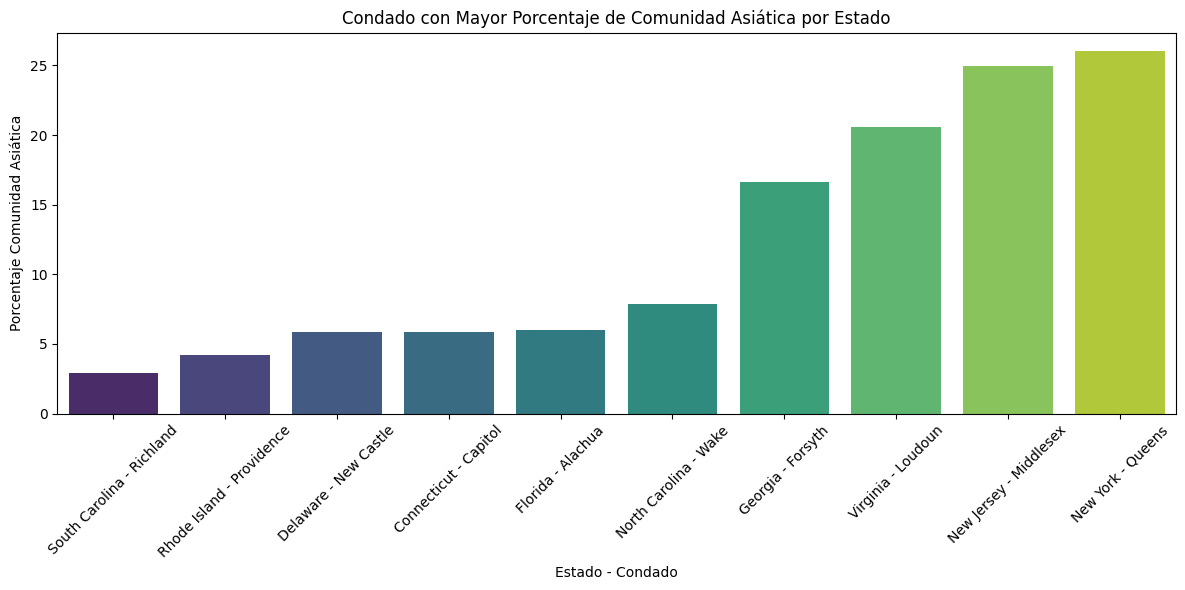

In [64]:
# Gráfico de barras para el máximo porcentaje por estado y condado
max_porcentaje_por_estado = max_porcentaje_por_estado.sort_values(by='porcentaje comunidad asiatica')
plt.figure(figsize=(12, 6))
sns.barplot(x='Estado y Condado', y='porcentaje comunidad asiatica', data=max_porcentaje_por_estado, palette='viridis')
plt.title('Condado con Mayor Porcentaje de Comunidad Asiática por Estado')
plt.xlabel('Estado - Condado')
plt.ylabel('Porcentaje Comunidad Asiática')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los estados y condados con los porcentajes más altos, como New York - Queens, New Jersey - Middlesex, y Virginia - Loudoun, podrían ser considerados como ubicaciones prioritarias para nuevos restaurantes o para intensificar la presencia de la marca.

Sin embargo, es importante notar que incluso en estados con porcentajes más bajos, como South Carolina o Rhode Island, hay condados con una presencia asiática significativa que podrían representar oportunidades de mercado menos saturadas. La distribución de la comunidad asiática es muy desigual entre condados de un mismo estado.

### Porcentaje Promedio de Comunidad Asiática por Estado

In [48]:
promedio_por_estado = df.groupby('Region')['porcentaje comunidad asiatica'].mean().reset_index()

C:\Users\fede\AppData\Local\Temp\ipykernel_10472\1319623564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='porcentaje comunidad asiatica', data=promedio_por_estado, palette='magma')


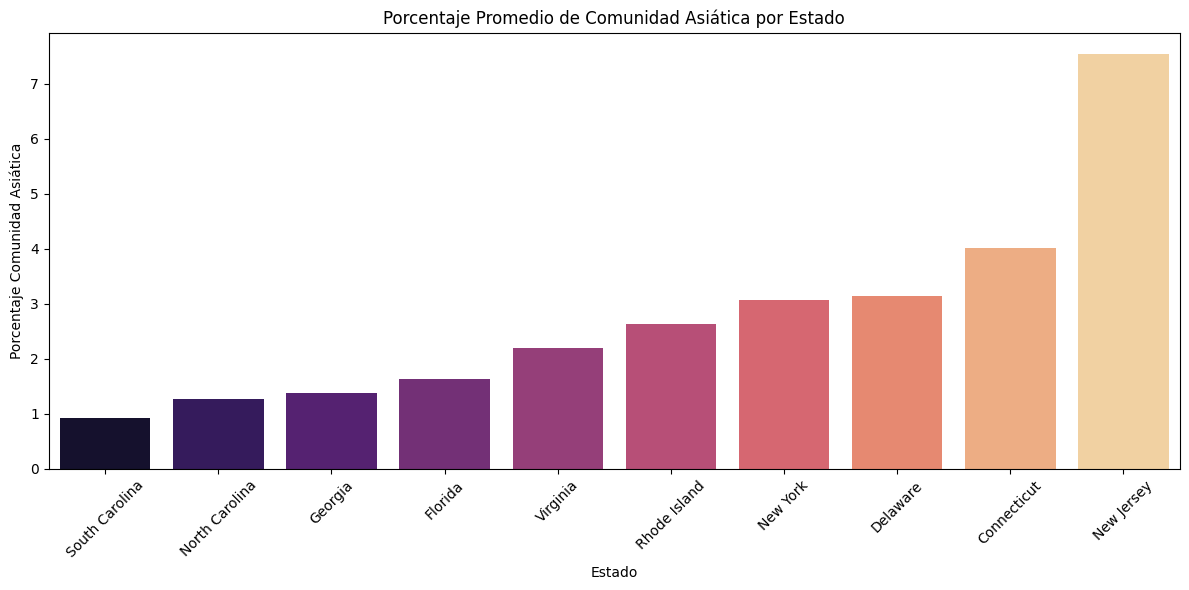

In [65]:
promedio_por_estado = promedio_por_estado.sort_values(by = 'porcentaje comunidad asiatica' )
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='porcentaje comunidad asiatica', data=promedio_por_estado, palette='magma')
plt.title('Porcentaje Promedio de Comunidad Asiática por Estado')
plt.xlabel('Estado')
plt.ylabel('Porcentaje Comunidad Asiática')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion:
La gráfica muestra una variación significativa en el porcentaje de población asiática entre diferentes estados de los Estados Unidos. Se observa una clara tendencia ascendente desde el sur hacia el noreste del país.

Los estados del sur como South Carolina, North Carolina, Georgia y Florida tienen los porcentajes más bajos de población asiática, todos por debajo del 2%. En contraste, los estados del noreste, particularmente New Jersey y Connecticut, muestran los porcentajes más altos, con New Jersey alcanzando casi el 8% de población asiática.
Algo que llama poderosamente la atención es que a pesar de que New York tiene el condado con más porcentaje de gente de la ocmunidad asiática, en media es superado por casi el doble por NewJersey